# Assignment 2 - Machine Learning Basics

## *AKSHAY PUNWATKAR*
Netid:  *AP509*

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
- Understand the bias-variance tradeoff and the impact of model flexibility algorithm performance and model selections

In [14]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
%config InlineBackend.figure_format = 'retina'

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

.

**(1)**  When sample size *n* is **large**, and the number of predictors *p* is **small**, a **flexible** method will perform **better** than an **inflexible** method. This is due the fact that with the larger sample size, chances of over fitting would be reduced even in a flexible model. 

**(2)** On the contrast, of the sample size *n* is **small**, the number of predictors *p* is **extremenly large**, a **flexible** method will perform **worse** than an **inflexible** method. This is due the the fact that smaller sample size in a flexible method could very likely lead to over fitting. 

**(3)** In case the relationship between predictors and response is highly non-linear, a **flexible** method will perform **better** than a **inflexible** method. This is due to the fact that flexible methods works better in capturing the trend in the data as compared to inflexible methods. 

**(4)** When the variance of error terms is extremely high, a **flexible** method will perform **worse** than the inflexible model. This is due the fact that flexible method will try to capture the high variance in the data which could very likely lead to over fitting, thus resulting in poor test performance.

*******

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

.

**(a)** *Regression* problem since the outcome variable is continous (Salary) ;    
*Inference* is the objective, to understand the which and how much the factors affect the salary ;     
Sample size = 500, Predictors = 3
        

**(b)** *Classification* problem because it's a binary outcome (success or failure) ;      
*Prediction* is the objective ;     
Sample size = 20, Predictors = 13

**(c)** *Regression* problem since the outcome is continous (% change in USD);    
*Prediction* is the objective ;    
Sample size = 52 (number of weeks in a year), Predictors = 3

*****

# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER**       
.

In [15]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])
#y = np.array([1,1,1,0,0,1])

**ANSWER**:

**(a)**

In [16]:
zero = np.zeros((1,3))
dist = np.sqrt(np.sum((X-zero)**2, axis=1)) #eucaldian distance calculation

*Table 2. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$* and their distance from  (0,0,0)

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |$dist$ |   
|------|-------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |3      |
| **2**| 2     | 0     | 0     | Red   |2      |    
| **3**| 0     | 1     | 3     | Red   |3.1622 |  
| **4**| 0     | 1     | 2     | Blue  |2.2360 |
| **5**| -1    | 0     | 1     | Blue  |1.4142 |
| **6**| 1     | 1     | 1     | Red   |1.7320 |

**(b)**

For K=1, point (0,0,0) would be **Blue** since the point (-1,0,1) which is blue, is the closest to the origin (0,0,0) as comapared to other 5 points. 

**(c)**

For K=3, point (0,0,0) would be **Red** since out of the three closest points ((-1,0,1),(1,1,1),(2,0,0)) to the oirigin based on the euclidean distance, two are Red and only one is blue. 

**(d)** 

If the bayes decision boundary is highly non-linear, increasing the value of K will make the boundary inflexible (more linear) so the best value of K would be **small**.

****

## 4
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

.

In [17]:
# (a) Write your own kNN classifier

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.X_train = np.array(())
        self.y_train = np.array(())
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.X_train = x.to_numpy()
        self.y_train = y.to_numpy()
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        x = x.to_numpy()
        for i in range(len(x)):
            dist_Xx = np.sqrt(np.sum((self.X_train-np.array(x[i]))**2, axis=1))
            near_neigh_k = np.argsort(dist_Xx)[:k]
            near_neigh = self.y_train[near_neigh_k]
            #predicted_y = np.bincount(near_neigh).argmax()  #For only integers y values
            val,count = np.unique(near_neigh, return_counts=True)
            predicted_y = val[np.argmax(count)]
            y_hat.append(predicted_y)
        # Return the estimated targets
            
        return np.array(y_hat)

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [18]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
#   and time the predictions of each


**(b)**

In [19]:
import pandas as pd
import time as t

#loading dataset

#High dimensional dataset
X_train_high = pd.read_csv("A2_X_train_high.csv",header=None,index_col=False)
y_train_high = pd.read_csv("A2_y_train_high.csv",header=None,index_col=False)
X_test_high = pd.read_csv("A2_X_test_high.csv",header=None,index_col=False)
y_test_high = pd.read_csv("A2_y_test_high.csv",header=None,index_col=False)

#Low dimensional dataset
X_train_low = pd.read_csv("A2_X_train_low.csv",header=None,index_col=False)
y_train_low = pd.read_csv("A2_y_train_low.csv",header=None,index_col=False)
X_test_low = pd.read_csv("A2_X_test_low.csv",header=None,index_col=False)
y_test_low = pd.read_csv("A2_y_test_low.csv",header=None,index_col=False)


**(c)**

In [20]:
classifier = Knn()
#fitting low dimensional dataset
s_time = t.time()
classifier.fit(X_train_low,y_train_low)
pred_low = classifier.predict(X_test_low,5)  
e_time = t.time()

model_acc = accuracy(y_test_low[0],pred_low)

print("\nModel runtime for LOW dimensional : %s seconds, with an accuracy of %s percent."%
      (round(e_time-s_time,3),model_acc*100))


Model runtime for LOW dimensional : 0.109 seconds, with an accuracy of 92.5 percent.


In [21]:
s_time = t.time()
classifier.fit(X_train_high,y_train_high)
pred_high = classifier.predict(X_test_high,5)  
e_time = t.time()

model_acc = accuracy(y_test_high[0],pred_high)

print("\nModel runtime for HIGH dimensional : %s seconds, with an accuracy of %s percent."%
      (round(e_time-s_time,3),model_acc*100))


Model runtime for HIGH dimensional : 0.271 seconds, with an accuracy of 99.3 percent.


**(d)**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

s_time = t.time()
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(X_train_low,y_train_low[0])
knn_pred_low = knn_class.predict(X_test_low)
e_time = t.time()

knn_acc = accuracy_score(y_test_low,knn_pred_low)

print("\n KNN Model runtime for LOW dimensional : %s seconds, with an accuracy of %s percent."%
      (round(e_time-s_time,3),knn_acc*100))


 KNN Model runtime for LOW dimensional : 0.047 seconds, with an accuracy of 92.5 percent.


In [23]:
s_time = t.time()
knn_class = KNeighborsClassifier(n_neighbors=5)
knn_class.fit(X_train_high,y_train_high[0])
knn_pred_high = knn_class.predict(X_test_high)
e_time = t.time()

knn_acc = accuracy_score(y_test_low,knn_pred_high)

print("\n KNN Model runtime for HIGH dimensional : %s seconds, with an accuracy of %s percent."%
      (round(e_time-s_time,3),knn_acc*100))


 KNN Model runtime for HIGH dimensional : 0.197 seconds, with an accuracy of 99.3 percent.


**(e)**

The primary drawbacks associated prediction being slows are :   
* Predictions processes are expected to run faster and provide results. Something as KNN which perform computation during prediction, might lead to latency in a process which depends on prediciton.    
* Slow prediction process are more resource intensive, which is not economical in a long run. 
* Evaluation of model performance could take a lot time due to slow prediction process. 

*****

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

**(a)**

In [24]:
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

X,y = make_moons(1000, noise=0.35)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

**(b)**

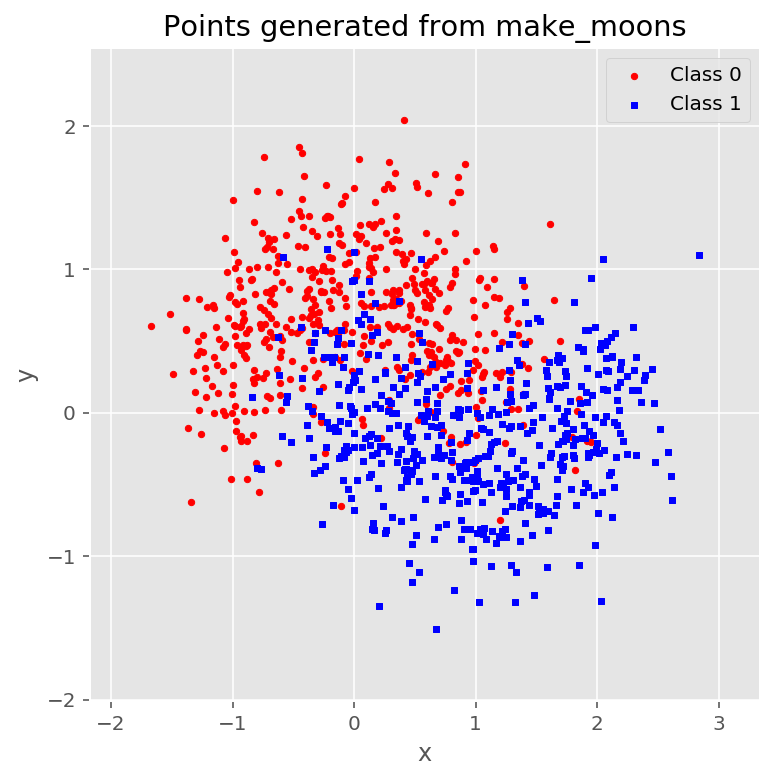

In [25]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 10})
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='o', label='Class 0',s=10)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', marker='s', label='Class 1',s=10)
plt.xlim(X[:, 0].min()-0.5, X[:, 0].max()+0.5)
plt.ylim(X[:, 1].min()-0.5, X[:, 1].max()+0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Points generated from make_moons')
plt.legend(loc='best')
plt.show()

**(c)**

In [26]:
sub_data = {}  # Creating dictionary for storing sample data
classifier_dict = {}  # Creating dictionary for storing model object
for i in range(1,4):
    sub_data[i] = df.sample(n=100).to_numpy()
    for j in [1,25,50]:
        knnclass = KNeighborsClassifier(n_neighbors=j)
        fit = knnclass.fit(sub_data[i][:,:2],sub_data[i][:,2])
        classifier_dict[(i,j)] = fit

**(d)**

In [27]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

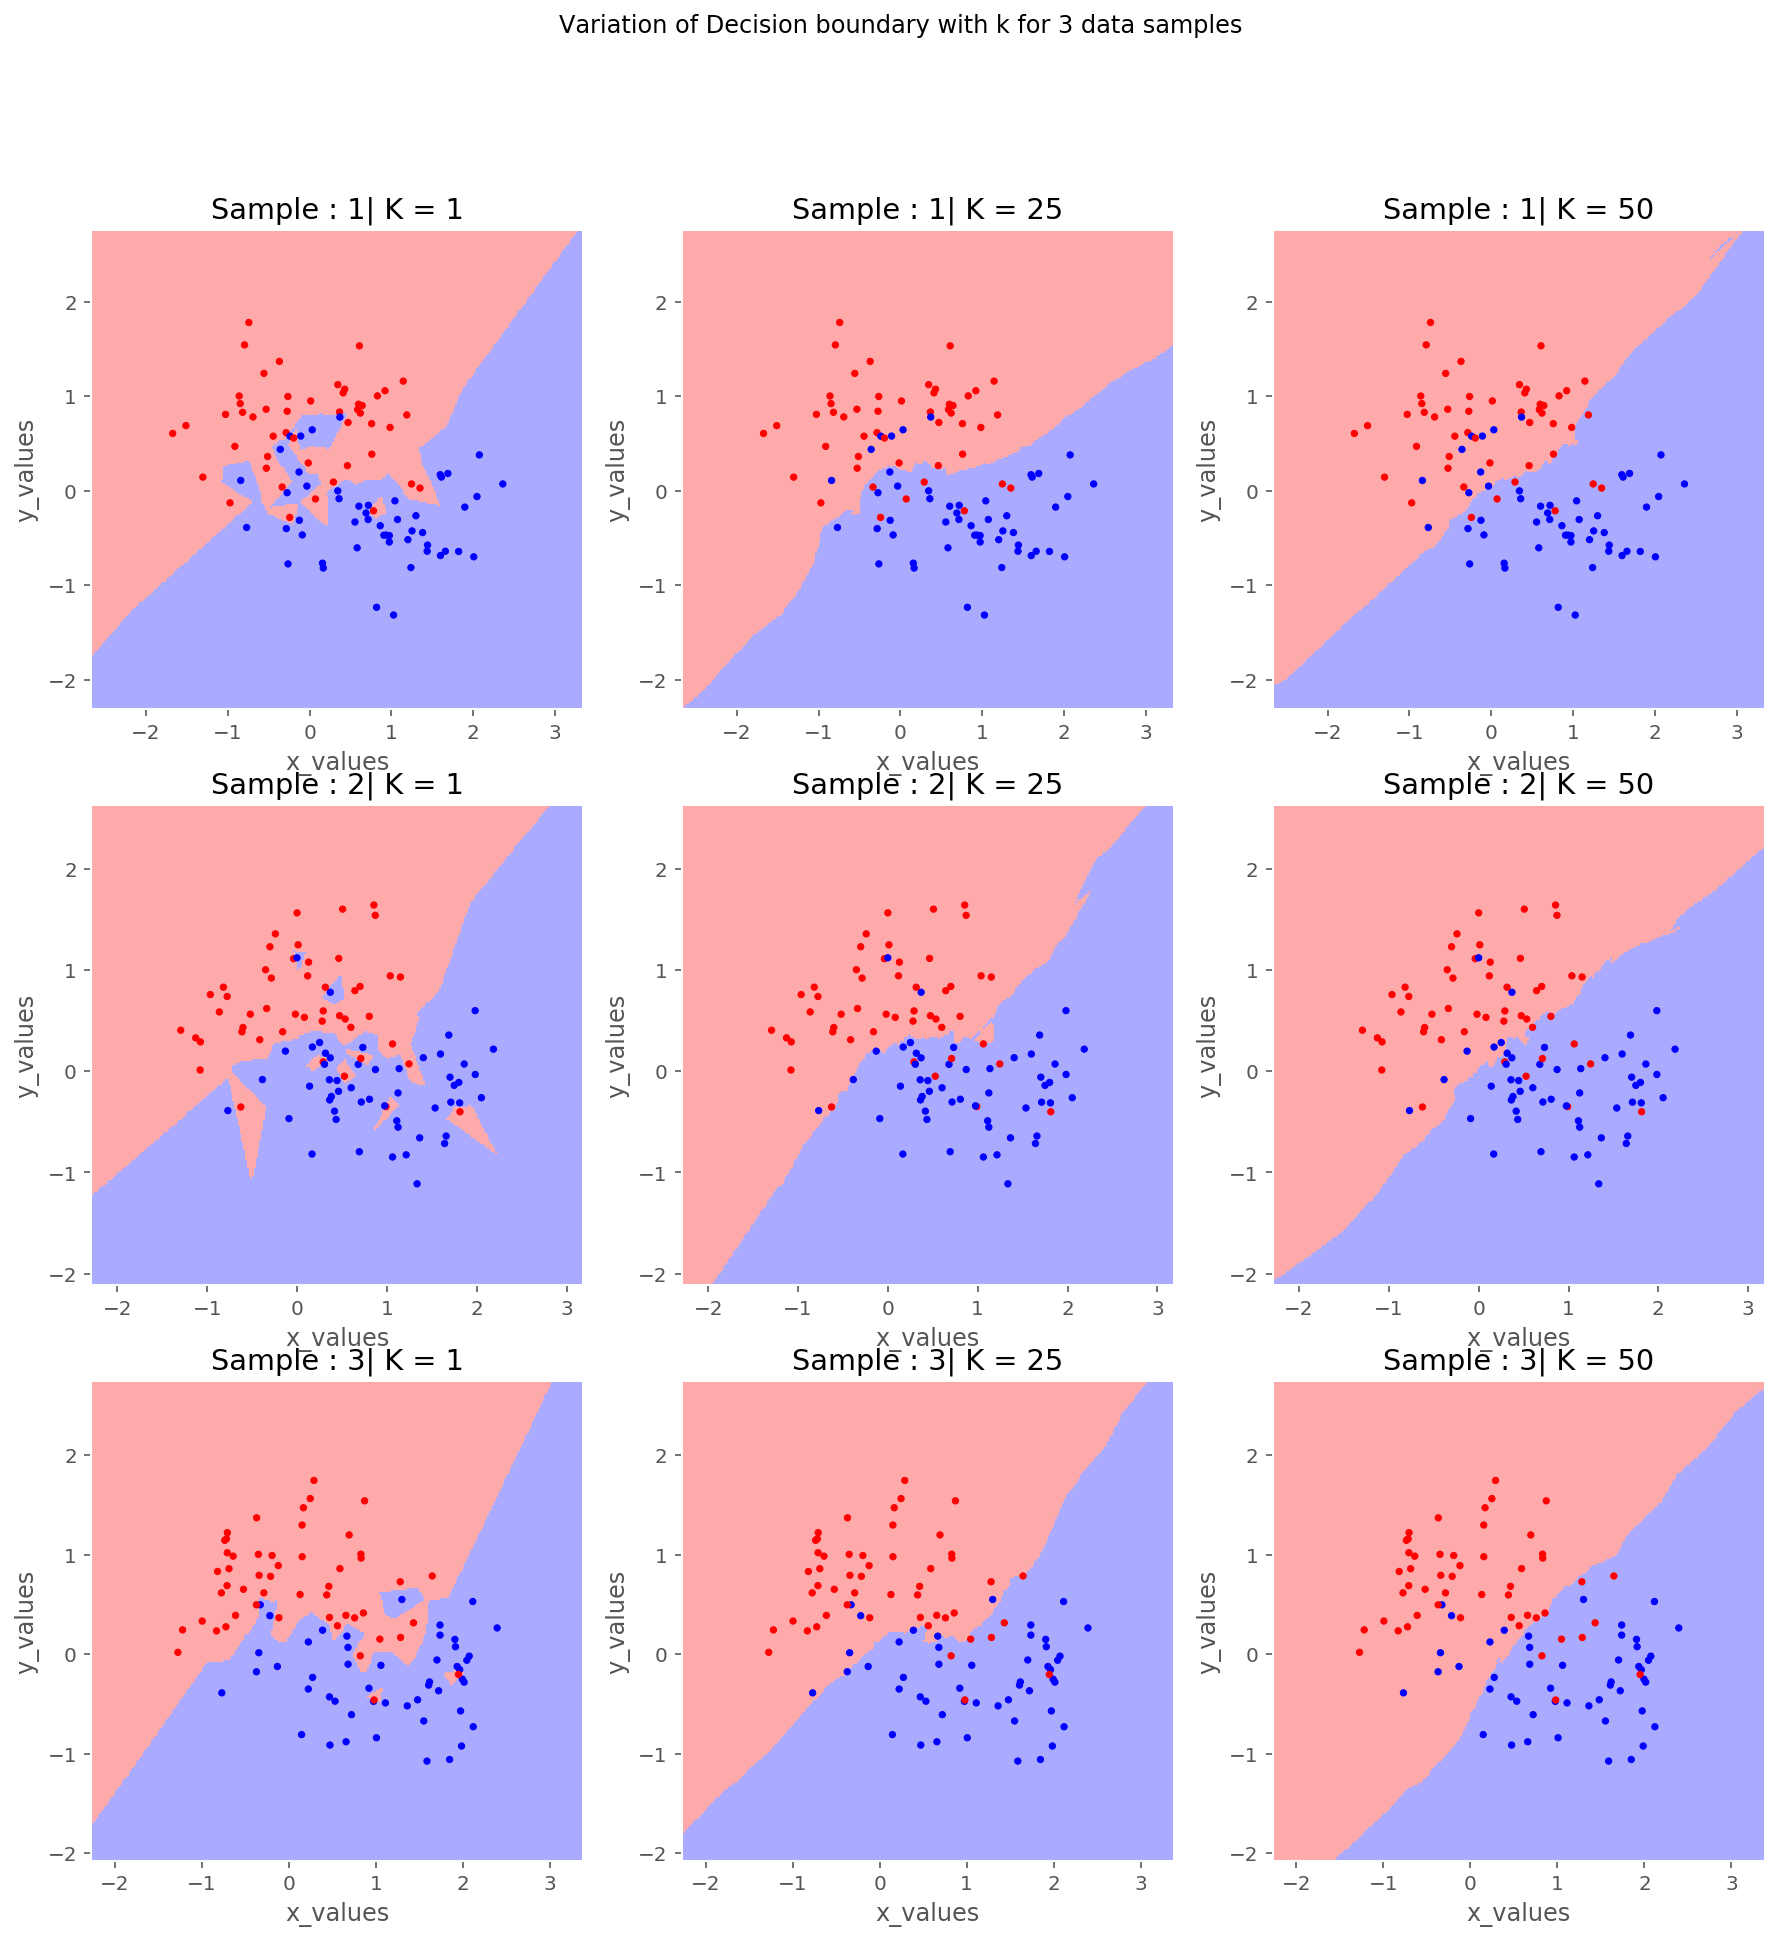

In [31]:
fig, axs = plt.subplots(3, 3)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams.update({'font.size': 10})
plt.xlabel('x')
plt.ylabel('y')
ax = 0
for i in range(1,4):
    ay = 0
    for j in [1,25,50]:
        x_min, x_max = sub_data[i][:,0].min() - 1, sub_data[i][:,0].max() + 1
        y_min, y_max = sub_data[i][:,1].min() - 1, sub_data[i][:,1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
        pred = classifier_dict[(i,j)].predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        axs[ax,ay].pcolormesh(xx, yy, pred, cmap=cmap_light)
        axs[ax,ay].scatter(sub_data[i][:, 0], sub_data[i][:, 1], 
                           c=sub_data[i][:, 2], cmap=cmap_bold, s=10)
        axs[ax,ay].set_xlabel('x_values')
        axs[ax,ay].set_ylabel('y_values')
        title = ('Sample : '+ str(i) +'| K = '+str(j))
        axs[ax,ay].set_title(title)
        ay += 1      
    ax +=1
fig.suptitle("Variation of Decision boundary with k for 3 data samples")    
plt.show()   

**(e)**

* As we go down the column, the decision boundary to does not seems to differ that much.    
* As we go across a row, with the increasing value of k the model seems to become less flexible. Also the over fitting appears to be reducing as value of k increases.   
* The decision boundary with K=25 seems the best because as compared with other k values, with k=1, the model seems to hihgly over fitting and very less generalised, and with k=50 the model seeems to underfit with a more rigid boundary leading to false predictions.   
* Decision boundary with k=1 varies the most with the data. This is due to fact that with k=1, each point is it's own nearest neighbour which leads to overfitting and highly flexible decision boundary. 

**(f)**

* As we increase the value of K (moving Left -> Right), the decision boundary is becoming less flexible, which will increase the Bias and reduce the variance. As can be seen from the right most plot (with K=50), the model will have high bias and less variance.   
* Similary, with left most plots (with k=1), the model is highly flexible leading to low bias but high variance. 
* The plot in the middle with k=25 seems to balance out bias and variance to give the best decision boundary.   

*****

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

**(a)**

In [390]:
X_test,y_test = make_moons(1000, noise=0.35)
df_test = pd.DataFrame(dict(x=X_test[:,0], y=X_test[:,1], label=y_test)).to_numpy()

**(b)**

In [392]:
from sklearn.metrics import accuracy_score

train_error = []
test_error = []
df_train = df.to_numpy()
for i in range(1,501):
    dataset = df_train[i]
    knnclass = KNeighborsClassifier(n_neighbors=i)
    knnclass.fit(df_train[:,:2],df_train[:,2])
    pred_train = knnclass.predict(df_train[:,:2]) 
    pred_test = knnclass.predict(df_test[:,:2])
    train_e = 1 - accuracy_score(df_train[:,2],pred_train)
    test_e = 1 - accuracy_score(df_test[:,2],pred_test)
    train_error.append(train_e)
    test_error.append(test_e)

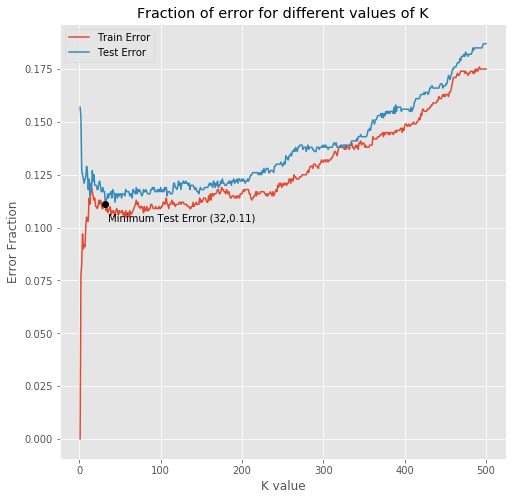

In [471]:
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 6})
plt.plot(range(1,501),train_error, label='Train Error')
plt.plot(range(1,501),test_error, label='Test Error')
le = np.argmin(test_error)
plt.plot(le+1,test_error[le],'o', c='black')
plt.annotate("Minimum Test Error (%s,%s)"%(le+1,round(test_error[le],2)), 
             xy=(le+1,test_error[le]),xytext=(35,0.103))
#plt.scatter(range(1,501),error)
plt.xlabel('K value')
plt.ylabel('Error Fraction')
plt.title('Fraction of error for different values of K')
plt.legend()
plt.show()

**(c)**

* Based on the plot it can be concluded that as the value of K increases, the test error rate drops to a certain extent (at k=32, error rate = 0.1059). However, past that, error rate fluctuates in a low range before steeply rising for the significantly higer values of K (in the range of 100s)  
* Similarly the train error rate starts with zero for a smaller value of k (over fitting), with steeply rising at arounfd  k=5. Following which it fluctuates in the similar error range before rising again when k reaches 100. 

**(d)**

* Values in the range of 1-20 (small values of k) represents small bias and high variance.
* Values in the range of 150 and above (high values of k) represents high bias and low variance 

**(e)**

The optimal value of K would be 32, which has the minimum test error, which is a sign of good generalize model

**(f)**

In general the flexibility of other models depend on the model paramaters. For eg. in case of linear regression, a polynomial regression will have move flexibility as compared to a simple linear regression model with a degree =1. 

*****

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER**

In [450]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

train = pd.read_csv('A2_Q7_train.csv', index_col=0).sort_values(by=['x'])
test = pd.read_csv('A2_Q7_test.csv', index_col=0).sort_values(by=['x'])

x_train = train.iloc[:,0].values.reshape(-1,1)
y_train = train.iloc[:,1]
x_test = test.iloc[:,0].values.reshape(-1,1)
y_test = test.iloc[:,1]


**(a)**

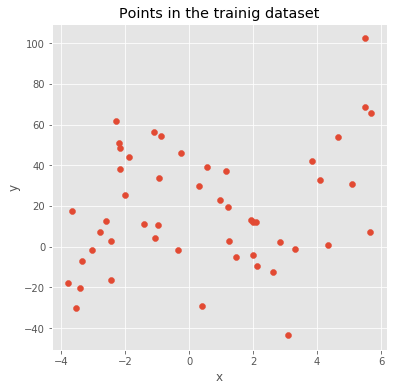

In [451]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 8})
plt.scatter(x=x_train,y=y_train)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Points in the trainig dataset')
plt.show()

**(b)**

In [452]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regressor_1 = LinearRegression()
regressor_1.fit(x_train,y_train)
y_pred = regressor_1.predict(x_train)
r2 = r2_score(y_train, y_pred)
mse  = mean_squared_error(y_pred,y_train)
coeff = regressor_1.coef_
inter = regressor_1.intercept_

print("\n R\u00b2 : %s"%(round(r2,4)))
print("\n Mean Squared Error : %s"%(round(mse,3)))
#print("\n Regession Equation : y = %s + %s * x"%(round(inter,3),round(coeff[0],3)))


 R² : 0.0649

 Mean Squared Error : 791.417


>>> Model Equation: $y = 17.205 + 2.591 x $

**(c)**

In [454]:
#transformation
x_train_2 = np.append(x_train, np.sin(x_train-1), 1)
#x_train_2 = np.concatenate((x_train,x_train**2),  axis=1)

In [458]:
regressor_2 = LinearRegression()
regressor_2.fit(x_train_2,y_train)
y_pred_2 = regressor_2.predict(x_train_2)
r2 = r2_score(y_train,y_pred_2)
mse  = mean_squared_error(y_pred_2,y_train)
coeff = regressor_2.coef_
inter = regressor_2.intercept_

print("\n R\u00b2 : %s"%(round(r2,2)))
print("\n Mean Squared Error : %s"%(round(mse,3)))
#print("\n Regession Equation : y = %s + %s * x + %s * sin(x-1)"%(round(inter,3),round(coeff[0],3),round(coeff[1],3)))


 R² : 0.35

 Mean Squared Error : 550.148


>>> Model Equation:  $y = 18.81 + 1.114 x - 22.519 sin(x-1)$ 

**(d)**

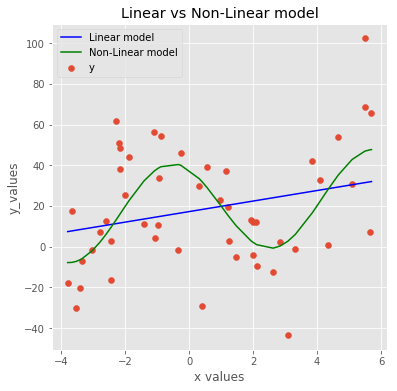

In [456]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 8})
x, y = np.meshgrid(np.arange(0, 10, 0.025), np.arange(0, 10, 0.025))
plt.scatter(x=x_train,y=y_train)
plt.plot(x_train,y_pred, label='Linear model', c='b')
plt.plot(x_train,y_pred_2, label='Non-Linear model', c='g')
plt.legend()
plt.xlabel('x values')
plt.ylabel('y_values')
plt.title("Linear vs Non-Linear model")
plt.show()

**(e)**

In [457]:
test_pred_1 = regressor_1.predict(x_test)
r2_1 = r2_score(y_test,test_pred_1)
mse_1  = mean_squared_error(test_pred_1,y_test)

print("\n For Linear Model on Test Data : ")
print("\t\t R\u00b2 : %s"%(round(r2_1,4)))
print("\t\t Mean Squared Error : %s"%(round(mse_1,3)))

x_test_2 = np.append(x_test, np.sin(x_test-1), 1)
test_pred_2 = regressor_2.predict(x_test_2)
r2_2 = r2_score(y_test,test_pred_2)
mse_2  = mean_squared_error(test_pred_2,y_test)

print("\n For Non-Linear Model on Test Data : ")
print("\t\t R\u00b2 : %s"%(round(r2_2,4)))
print("\t\t Mean Squared Error : %s"%(round(mse_2,3)))



 For Linear Model on Test Data : 
		 R² : -0.1329
		 Mean Squared Error : 1116.663

 For Non-Linear Model on Test Data : 
		 R² : 0.0526
		 Mean Squared Error : 933.861


**(f)**

The **non-linear model** with transformation performs **much better** on a training as well test data as compared to the linear model. Looking at a scatter plot of the data showed a wave pattern (non-linear), something similar to a sine wave. After taking into account the wave pattern and adding a sin transformation over *x*, the model showed a much better performance in tracing a similar as *y*.

**(g)**

In case the test data is significantly different than the training data the model have given a much better or worse performance. This significant difference would have huge impact to the predictive capabilites of the model, because while modeling an important assumption is that the training and test data comes from the same population and have similar p 

*******

****